In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
cast = pd.read_csv('cast.csv')

bot = pd.read_csv('bottle.csv')

<ipython-input-33-bb6cb57c4ddc>:1: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  cast = pd.read_csv('cast.csv')
<ipython-input-33-bb6cb57c4ddc>:3: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bot = pd.read_csv('bottle.csv')


In [ ]:
bot.info()

# Now we need to simplyfy our data


In [35]:
bottle = bot.iloc[:,[0, 4, 5, 6, 7, 8]]
bottle.head()

,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta
0,1,0,10.50,33.440,NaN,25.649
1,1,8,10.46,33.440,NaN,25.656
2,1,10,10.46,33.437,NaN,25.654
3,1,19,10.45,33.420,NaN,25.643
4,1,20,10.45,33.421,NaN,25.643


In [36]:
bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Cst_Cnt  864863 non-null  int64  
 1   Depthm   864863 non-null  int64  
 2   T_degC   853900 non-null  float64
 3   Salnty   817509 non-null  float64
 4   O2ml_L   696201 non-null  float64
 5   STheta   812174 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 39.6 MB


In [37]:
import seaborn as sn

# Thats all null values in my dataset

<Axes: >

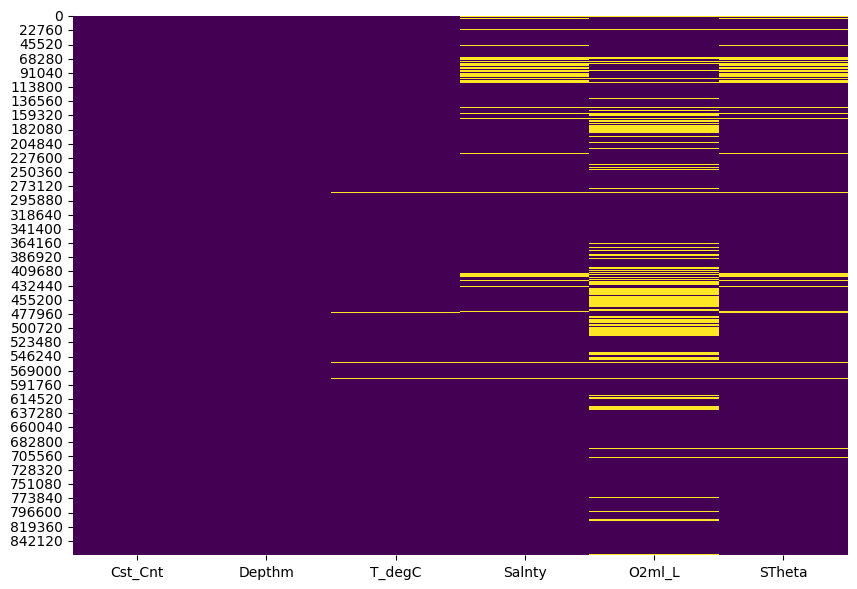

In [38]:
plt.rcParams["figure.figsize"] = (10, 7)
sn.heatmap(bottle.isna(), cbar = False, cmap = 'viridis')


# Now I iterate through columns, to get null values

In [39]:
cols = bottle.columns

for column in cols:
  bottle = bottle[~bottle[column].isnull()]

# I reset indexes by droping null values

<Axes: >

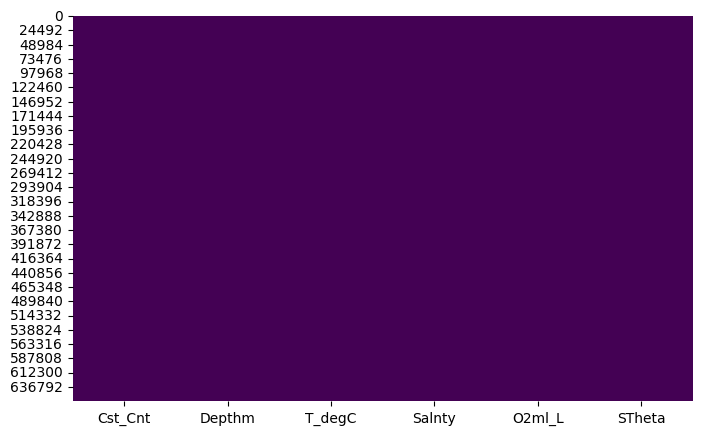

In [40]:
bottle = bottle.reset_index(drop = True)
plt.rcParams["figure.figsize"] = (8, 5)
sn.heatmap(bottle.isna(),cbar = False, cmap = 'viridis')

# Now it gonna look at correlation between columns


<Axes: >

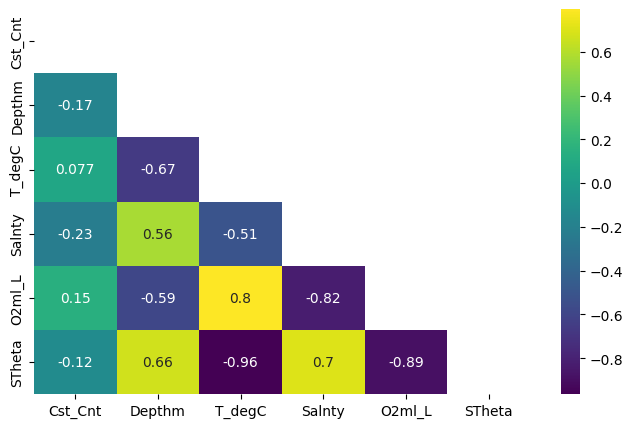

In [41]:
plt.figure.figsize = (10, 7)
mask = np.triu(np.ones_like(bottle.corr(numeric_only = True), dtype = bool))
sn.heatmap(bottle.corr(numeric_only = True), cbar = True, annot = True, cmap = 'viridis', mask = mask)

# Now I plot on graph correlation between temperature and depth, also salinity and depth

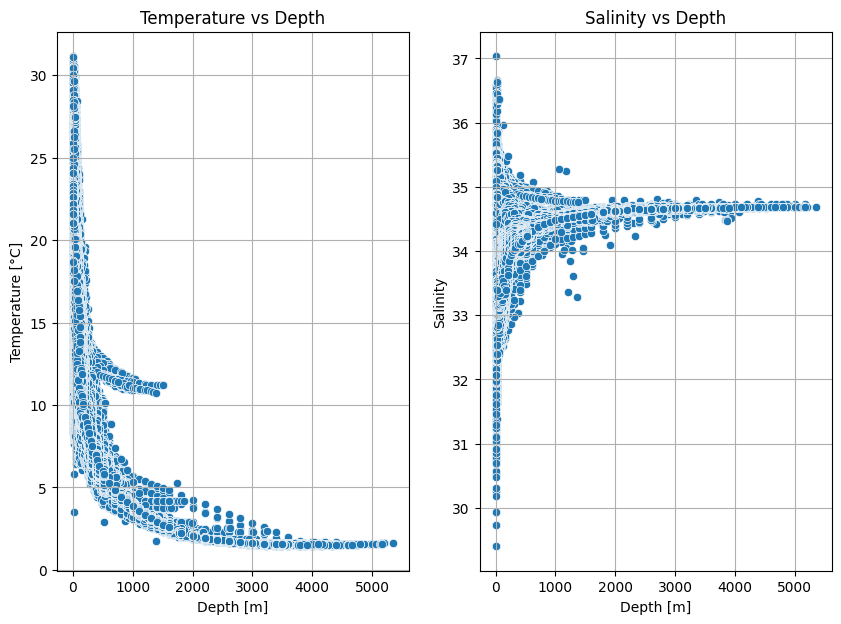

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (10,7))
g1 = sn.scatterplot(data = bottle, x = "Depthm", y = "T_degC", ax = ax[0])
ax[0].set(xlabel = "Depth [m]", ylabel = "Temperature [°C]", title = "Temperature vs Depth")
ax[0].grid()

g2 = sn.scatterplot(data = bottle, x = "Depthm", y = "Salnty", ax = ax[1])
ax[1].set(xlabel = "Depth [m]", ylabel = "Salinity", title = "Salinity vs Depth")
ax[1].grid()

# I plot correlation between Salinty and Temperature

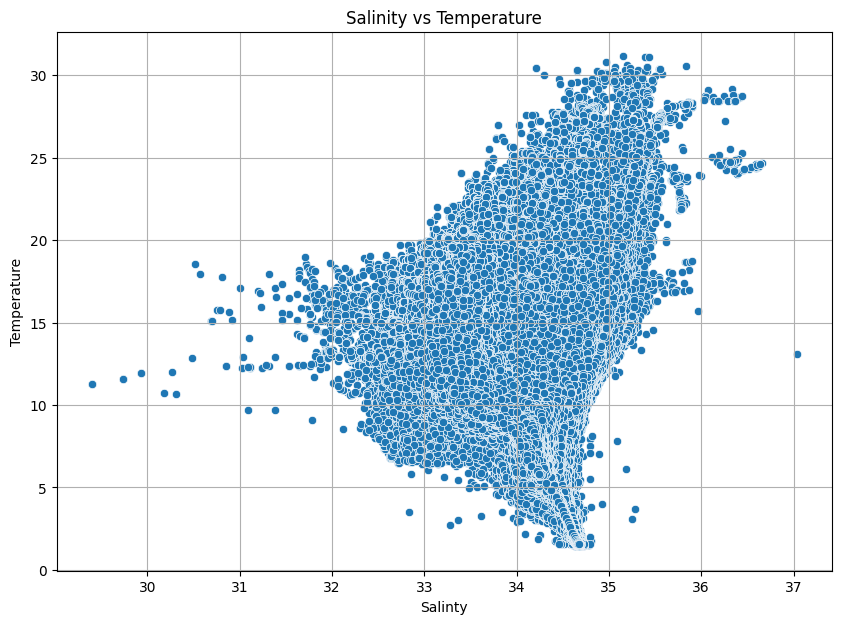

In [64]:
plt.rcParams["figure.figsize"] = (10, 7)
ax = sn.scatterplot(data = bottle, x = "Salnty", y = "T_degC")
ax.set(xlabel = "Salinty", ylabel = "Temperature", title = "Salinity vs Temperature")
plt.grid()

In [58]:
bottle.head()

,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta
0,71,0,10.30,33.030,5.90,25.364
1,71,6,18.46,32.920,6.02,23.568
2,71,10,10.29,32.951,6.04,25.304
3,71,15,10.29,32.990,6.06,25.335
4,71,20,10.33,33.005,6.04,25.339


# Now I gonna prepare Train and Test sets for my model

In [74]:
from sklearn.model_selection import train_test_split

bottle_train, bottle_test = train_test_split(bottle, test_size = 0.2, random_state = 0)

print("bottle_train:", bottle_train.shape)
print("bottle_test:", bottle_test.shape, "\n")

features = bottle.columns.drop("T_degC").tolist()
target = ["T_degC"]
X_train = bottle_train[features].values
y_train = bottle_train[target].values
X_test = bottle_test[features].values
y_test = bottle_test[target].values

bottle_train: (529014, 6)
bottle_test: (132254, 6) 



# I import Linear Model and I gonna do predictions on solo one feature which is Salinty, so I prepare separately new train and test set

In [68]:
from sklearn.linear_model import LinearRegression
features1 = ['Salnty']
X_train1 = bottle_train[features1].values
y_train1 = bottle_train[target].values
X_test1 = bottle_test[features1].values
y_test1 = bottle_test[target].values

model = LinearRegression()
model.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)

# My Simple Linear Regression Error is not so high, but maybe I can reduce it later with help of Multi Linear Regression

In [71]:
from sklearn.metrics import mean_squared_error

print(model)

mse_lin = mean_squared_error(y_test1, y_pred1)
RMSE_lin = mse_lin ** (1 / 2.0)

print('RMSE_lin:', RMSE_lin)

LinearRegression()
RMSE_lin: 3.6437120792583206


# I plot on graph my Linear Model

[Text(0.5, 0, 'Salinity'),
 Text(0, 0.5, 'Temperature'),
 Text(0.5, 1.0, 'Linear Regression')]

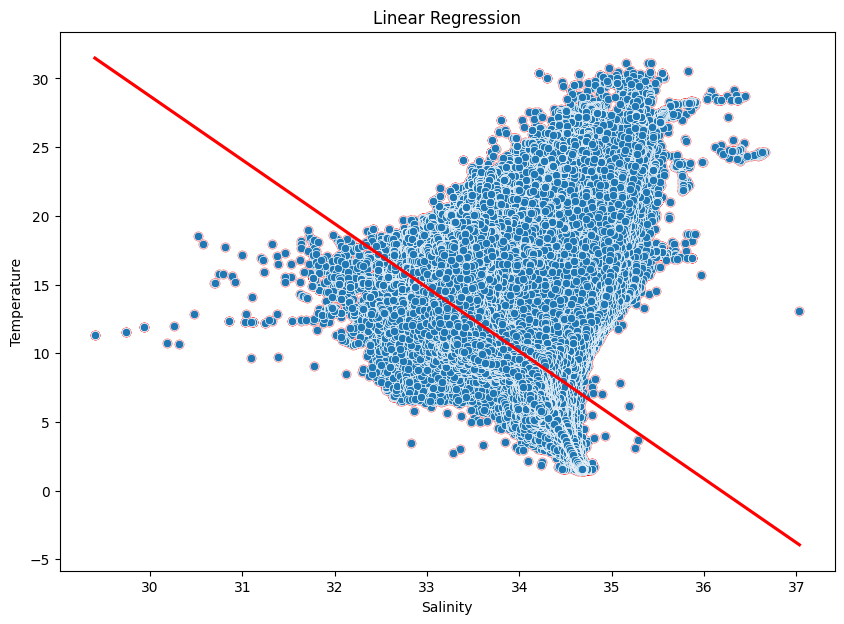

In [72]:
g2 = sn.regplot(x = 'Salnty', y = 'T_degC', data = bottle, color = 'red')
sn.scatterplot(data = bottle, x = 'Salnty', y = 'T_degC')
g2.set(xlabel = 'Salinity', ylabel = 'Temperature', title = 'Linear Regression')

# I can see that in case of Multi Linear Regression Error is lower

In [76]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model)
y_pred2 = model.predict(X_test)

mse_multilin = mean_squared_error(y_test, y_pred2)
RMSE_multilin = mse_multilin ** (1 / 2.0)

print('RMSE_multilin:', RMSE_multilin)

LinearRegression()
RMSE_multilin: 0.33167569977776773
